In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
%run rbf.ipynb
np.random.seed(167176)
n_gen = 200
n_samples = 2*n_gen
noise = np.random.uniform(low=-0.5,high=0.5,size=n_gen)
red_cluster = np.random.multivariate_normal(mean=np.array((0,2)),cov=np.eye(2)*0.25,size=n_gen)

In [3]:
X = np.linspace(start=-3.5,stop=3.5,num=n_gen)
Y = -0.5*X**2+noise

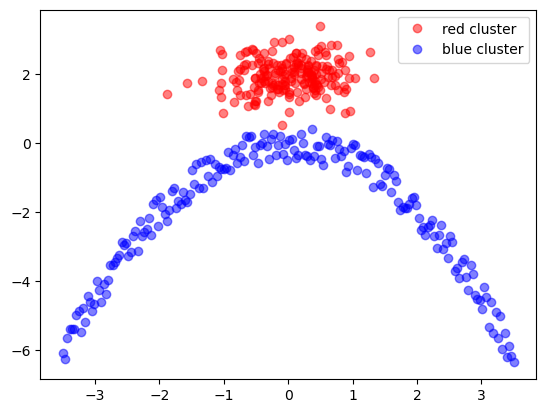

In [4]:
plt.plot(red_cluster[:,0],red_cluster[:,1],'ro',label='red cluster',alpha=0.5)
plt.plot(X, Y,'bo',label='blue cluster',alpha=0.5)
plt.legend()

In [5]:
W = np.zeros((n_samples,n_samples))
epsilon = 0.01

In [6]:
blue_data = np.zeros((n_gen,2))
blue_data[:,0] = X
blue_data[:,1] = Y
whole_data = np.vstack((red_cluster,blue_data))

In [7]:
for i in range(n_samples):
    for k in range(i,n_samples):
        W[i,k] = rbf(x=whole_data[i,:],y=whole_data[k,:],l_squared=4)
        if W[i,k] <= epsilon:
            W[i,k] = 0
        W[k,i] = W[i,k]
    W[i,i] = 1

In [8]:
diag_mat = np.zeros((n_samples,n_samples))

In [9]:
for i in range(n_samples):
    diag_mat[i,i] = np.sum(W[:,i])

In [10]:
L = diag_mat - W

In [11]:
eigen = np.linalg.eig(L)

In [12]:
eigenvalues, eigenvectors = eigen

In [13]:
for i in range(eigenvalues.shape[0]):
    if i<1e-10:
        eigenvalues[i] = 0

sorted_eigenvalues = np.argsort(eigenvalues)

In [14]:
n_cluster = 2
U = np.zeros((n_samples,n_cluster))
for i in range(n_cluster):
    U[:,i] = eigenvectors[:,sorted_eigenvalues[i]]

In [15]:
cluster_fit = KMeans(n_clusters=n_cluster).fit(U)

In [16]:
labels = cluster_fit.predict(U)

In [17]:
df_points = pd.DataFrame(whole_data)

In [18]:
df_points['label'] = labels
df_points.columns = ['x1','x2','label']

In [19]:
colors = {0: 'orange', 1: 'purple'}
color_list = [colors[group] for group in df_points['label']]

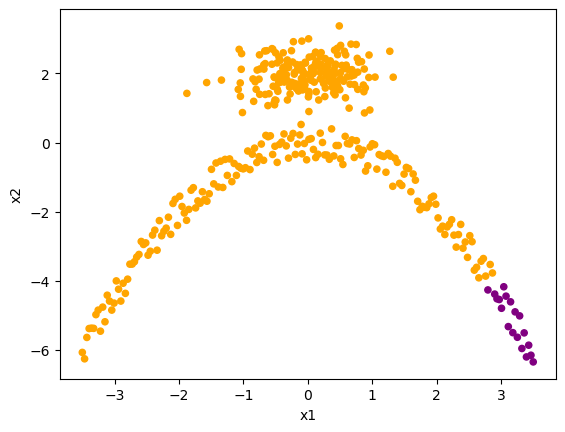

In [20]:
ax = df_points.plot.scatter('x1','x2', c=color_list)

In [21]:
test_kmeans = KMeans(n_clusters=2).fit_predict(whole_data)

In [22]:
kmeans_df = pd.DataFrame(whole_data)
kmeans_df.columns = ['x1','x2']
kmeans_df['label'] = test_kmeans

In [23]:
colors_bis = {0: 'orange', 1: 'purple'}
color_list_bis = [colors_bis[group] for group in kmeans_df['label']]

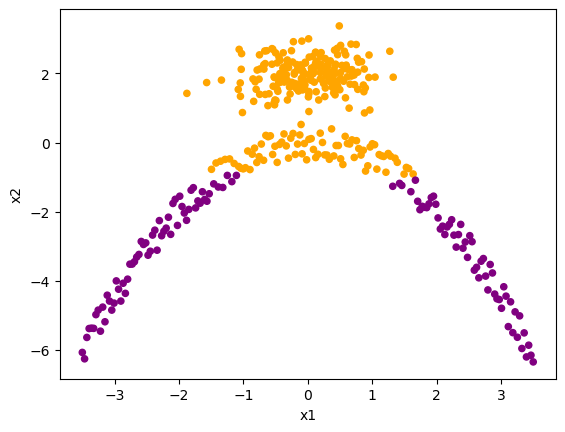

In [24]:
ax = kmeans_df.plot.scatter('x1','x2', c=color_list_bis)